In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.mixture import GaussianMixture
import seaborn as sns

---
## **Q.1)**


---
a)



In [ ]:
data = pd.read_excel('Question2a.xlsx', header=None)
data

,0,1
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894
...,...,...
295,7.302787,3.380160
296,6.991984,2.987067
297,4.825534,2.779617
298,6.117681,2.854757


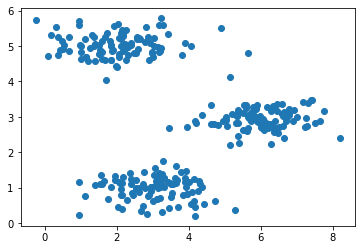

In [ ]:
data= np.array(data).reshape(len(data),2)
plt.scatter(data[:,0], data[:,1])

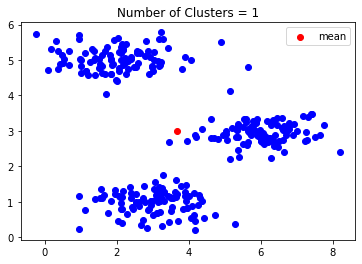

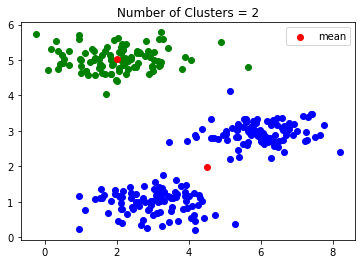

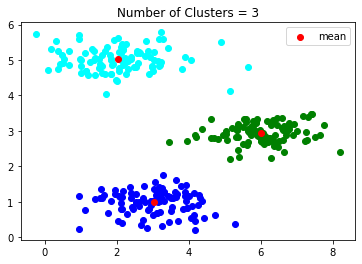

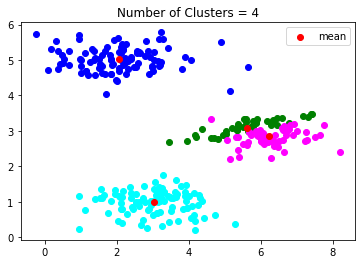

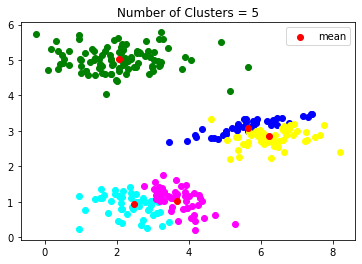

In [ ]:
# clustering using Gaussian-Mixture-Model
for k in range(1,6):
  GMM = GaussianMixture(n_components=k, n_init=10)
  pred = GMM.fit_predict(data)
  l1 = []
  co = [ 'blue','green', 'cyan', 'magenta', 'yellow']
  for i in range(k):
    l1.append([])
  #pred = pred.astype(int)
  for i in range(len(pred)):
    l1[pred[i]].append(data[i])
  for i in range(k):
    x = np.array(l1[i]).reshape(len(l1[i]),2)
    plt.scatter(x[:,0], x[:,1], color=co[i])
  plt.scatter(GMM.means_[:,0], GMM.means_[:,1], color='red', label='mean')
  plt.legend()
  plt.title('Number of Clusters = %d'%k)
  plt.show()

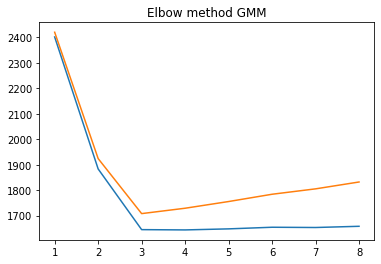

In [ ]:
bic = []
aic = []
for i in range(8):
    gm = GaussianMixture( n_components = i+1, n_init=10)
    gm.fit(data)
    bic.append(gm.bic(data))
    aic.append(gm.aic(data))

fig = plt.figure()
plt.plot([1,2,3,4,5,6,7,8], aic)
plt.plot([1,2,3,4,5,6,7,8], bic)
plt.title('Elbow method GMM')
plt.show()

Optimal number of clusters: 3

---
b)

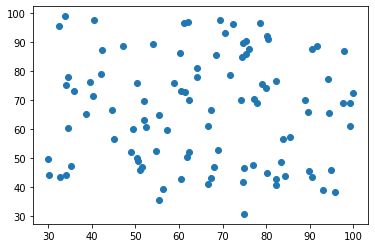

In [ ]:
data2 = pd.read_excel('Question2b.xls')
x1 = np.array(data2['x1'])
x2 = np.array(data2['x2'])
X = np.c_[x1,x2]
plt.scatter(X[:,0], X[:,1])

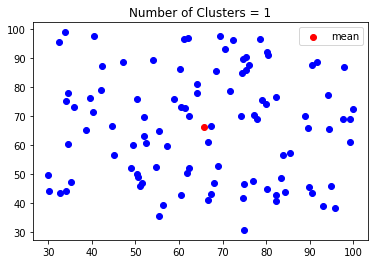

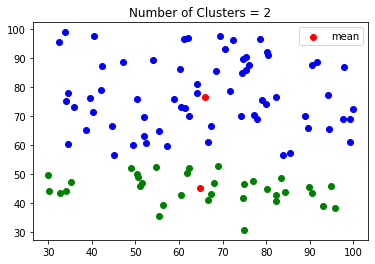

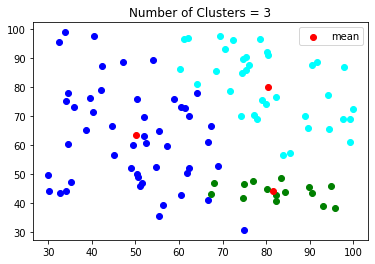

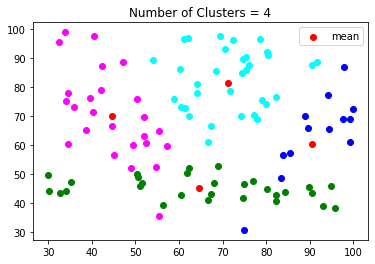

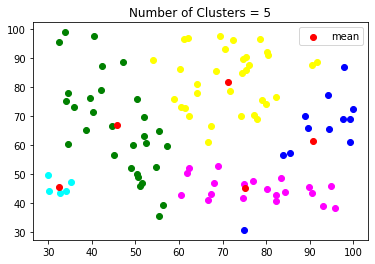

In [ ]:
# clustering using Gaussian-Mixture-Model
for k in range(1,6):
  GMM = GaussianMixture(n_components=k, n_init=10)
  pred = GMM.fit_predict(X)
  l1 = []
  co = [ 'blue','green', 'cyan', 'magenta', 'yellow']
  for i in range(k):
    l1.append([])
  #pred = pred.astype(int)
  for i in range(len(pred)):
    l1[pred[i]].append(X[i])
  for i in range(k):
    x = np.array(l1[i]).reshape(len(l1[i]),2)
    plt.scatter(x[:,0], x[:,1], color=co[i])
  plt.scatter(GMM.means_[:,0], GMM.means_[:,1], color='red', label='mean')
  plt.legend()
  plt.title('Number of Clusters = %d'%k)
  plt.show()

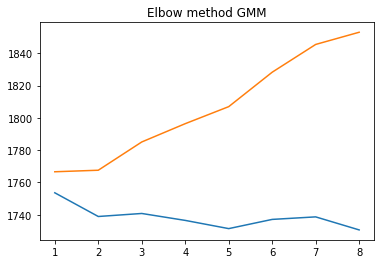

In [ ]:
bic = []
aic = []
for i in range(8):
    gm = GaussianMixture( n_components = i+1, n_init=10)
    gm.fit(X)
    bic.append(gm.bic(X))
    aic.append(gm.aic(X))

fig = plt.figure()
plt.plot([1,2,3,4,5,6,7,8], aic)
plt.plot([1,2,3,4,5,6,7,8], bic)
plt.title('Elbow method GMM')
plt.show()

Optimal number of clusters: 2

---
## **Q.2)**

In [ ]:
data = pd.read_csv('dataset3.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
data["Gender_code"] = data["Gender"].map({"Female" : 0, "Male" : 1})
data.drop(columns=["CustomerID","Gender"], inplace=True)
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_code
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

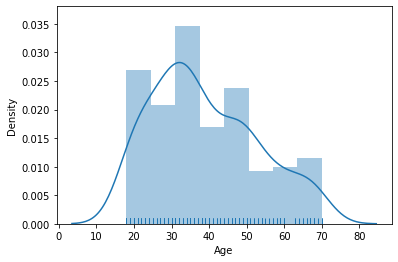

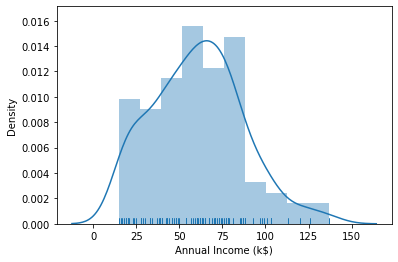

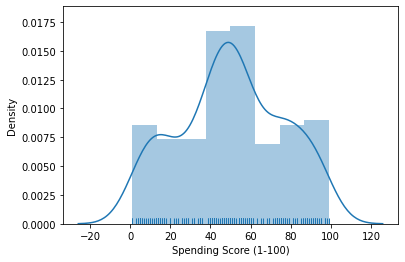

In [ ]:
sns.distplot(data.Age, rug=True)
plt.figure()
sns.distplot(data['Annual Income (k$)'], rug=True)
plt.figure()
sns.distplot(data['Spending Score (1-100)'], rug=True)

Text(0, 0.5, 'Spending Score')

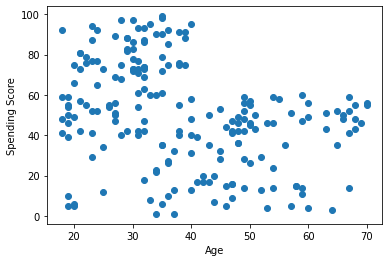

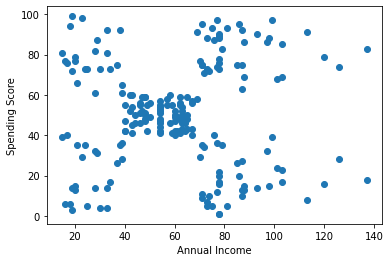

In [ ]:
plt.figure()
plt.scatter(data['Age'], data['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.figure()
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

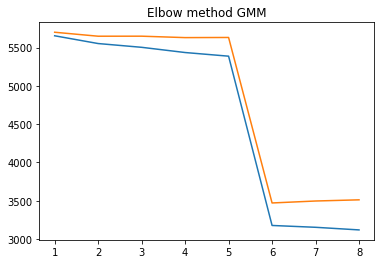

In [ ]:
bic = []
aic = []
for i in range(8):
    gm = GaussianMixture( n_components = i+1, n_init=10)
    gm.fit(data)
    bic.append(gm.bic(data))
    aic.append(gm.aic(data))

fig = plt.figure()
plt.plot([1,2,3,4,5,6,7,8], aic)
plt.plot([1,2,3,4,5,6,7,8], bic)
plt.title('Elbow method GMM')
plt.show()

Optimal number of clusters: 6


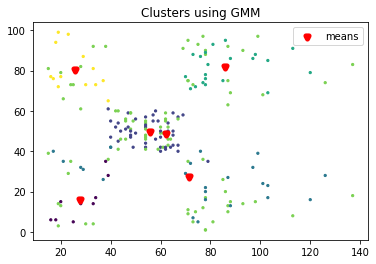

In [ ]:
gm = GaussianMixture(n_components = 6,
                     n_init = 10)
gm.fit(data)

plt.figure()

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'],
            c=gm.predict(data),
            s=5)
plt.scatter(gm.means_[:, 1], gm.means_[:, 2],
            marker='v',
            s=10,               # marker size
            linewidths=5,      # linewidth of marker edges
            color='red', label='means')
plt.legend()
plt.title('Clusters using GMM')
plt.show()

In [ ]:
gm.means_

array([[46.04898342, 27.53898249, 15.94501909,  0.        ],
       [42.32417703, 55.85280938, 49.32871962,  0.        ],
       [39.30390443, 71.55184997, 27.1110441 ,  0.        ],
       [32.19261787, 85.95528712, 81.6123189 ,  0.        ],
       [39.80681818, 62.22727273, 48.51136364,  1.        ],
       [25.50409067, 25.68569307, 80.51868766,  0.        ]])

In [ ]:
gm.weights_

array([0.04376419, 0.22312369, 0.12292951, 0.10528695, 0.44      ,
       0.06489566])

In [ ]:
gm.covariances_

array([[[ 1.60834279e+02,  5.99167262e+01,  7.94873646e+01,
          0.00000000e+00],
        [ 5.99167262e+01,  6.49146725e+01,  6.46464846e+01,
          0.00000000e+00],
        [ 7.94873646e+01,  6.46464846e+01,  1.02553571e+02,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e-06]],

       [[ 2.16297137e+02, -1.24381032e+01,  4.01809505e+00,
          0.00000000e+00],
        [-1.24381032e+01,  9.09449629e+01, -2.06759681e+01,
          0.00000000e+00],
        [ 4.01809505e+00, -2.06759681e+01,  4.41498850e+01,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e-06]],

       [[ 8.08451577e+01,  9.35194030e+01, -7.06114514e+01,
          0.00000000e+00],
        [ 9.35194030e+01,  9.31550974e+02, -1.40204839e+02,
          0.00000000e+00],
        [-7.06114514e+01, -1.40204839e+02,  1.26892441e+02,
          0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+